# **Code X**    

In [46]:
#import important libraries and Data uploading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import shap
from sklearn.model_selection import cross_val_score

df = pd.read_csv("Aviation_KPIs_Dataset.csv")
df.head()

,Flight Number,Scheduled Departure Time,Actual Departure Time,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD)
0,FL885,2024-05-20 11:51:21,2024-07-10 02:38:53,50,12.36,115,79.18,96.24,9.21,4.15,10953.75,27847.59,17.90,1058.68,2.46,2639.46,6710.26,-16893.84
1,FL930,2024-01-23 06:56:22,2024-07-07 02:53:44,27,14.53,83,98.59,80.49,1.55,3.93,31597.25,1564.41,7.70,2941.32,2.89,8040.01,398.07,30032.84
2,FL478,2024-05-30 09:18:38,2024-12-05 01:00:54,108,10.73,87,67.44,97.90,2.06,4.26,13700.27,30494.88,5.84,1920.45,1.34,3216.03,7158.42,-16794.61
3,FL637,2024-08-15 05:21:46,2024-09-21 13:23:41,64,15.10,99,69.01,80.17,6.85,4.13,39913.01,13444.09,24.09,3167.79,0.60,9664.17,3255.23,26468.92
4,FL318,2024-07-25 15:29:58,2024-03-21 15:05:54,30,13.46,114,50.36,82.23,7.30,4.97,11531.48,34668.98,7.18,619.80,0.84,2320.22,6975.65,-23137.50


# **Understand the Data**

In [3]:
#Getting the shape, Null_values, Duplicates, Info, Describe
print(f"1. The Shape of Data:{df.shape}.")
print(f"2. The Null Values in Data:{df.isnull().sum()}.")
print(f"3. The Duplicates in Data:{df.duplicated().sum()}.")
print(f"4. The Information of the data:{df.info}.")
print(f"5. The Description of the data:{df.describe()}.")

1. The Shape of Data:(200000, 18).
2. The Null Values in Data:Flight Number                       0
Scheduled Departure Time            0
Actual Departure Time               0
Delay (Minutes)                     0
Aircraft Utilization (Hours/Day)    0
Turnaround Time (Minutes)           0
Load Factor (%)                     0
Fleet Availability (%)              0
Maintenance Downtime (Hours)        0
Fuel Efficiency (ASK)               0
Revenue (USD)                       0
Operating Cost (USD)                0
Net Profit Margin (%)               0
Ancillary Revenue (USD)             0
Debt-to-Equity Ratio                0
Revenue per ASK                     0
Cost per ASK                        0
Profit (USD)                        0
dtype: int64.
3. The Duplicates in Data:0.
4. The Information of the data:<bound method DataFrame.info of        Flight Number Scheduled Departure Time Actual Departure Time  \
0              FL885      2024-05-20 11:51:21   2024-07-10 02:38:53   
1     

# EDA [Univariate, Bivariate, and Multivariate analysis]

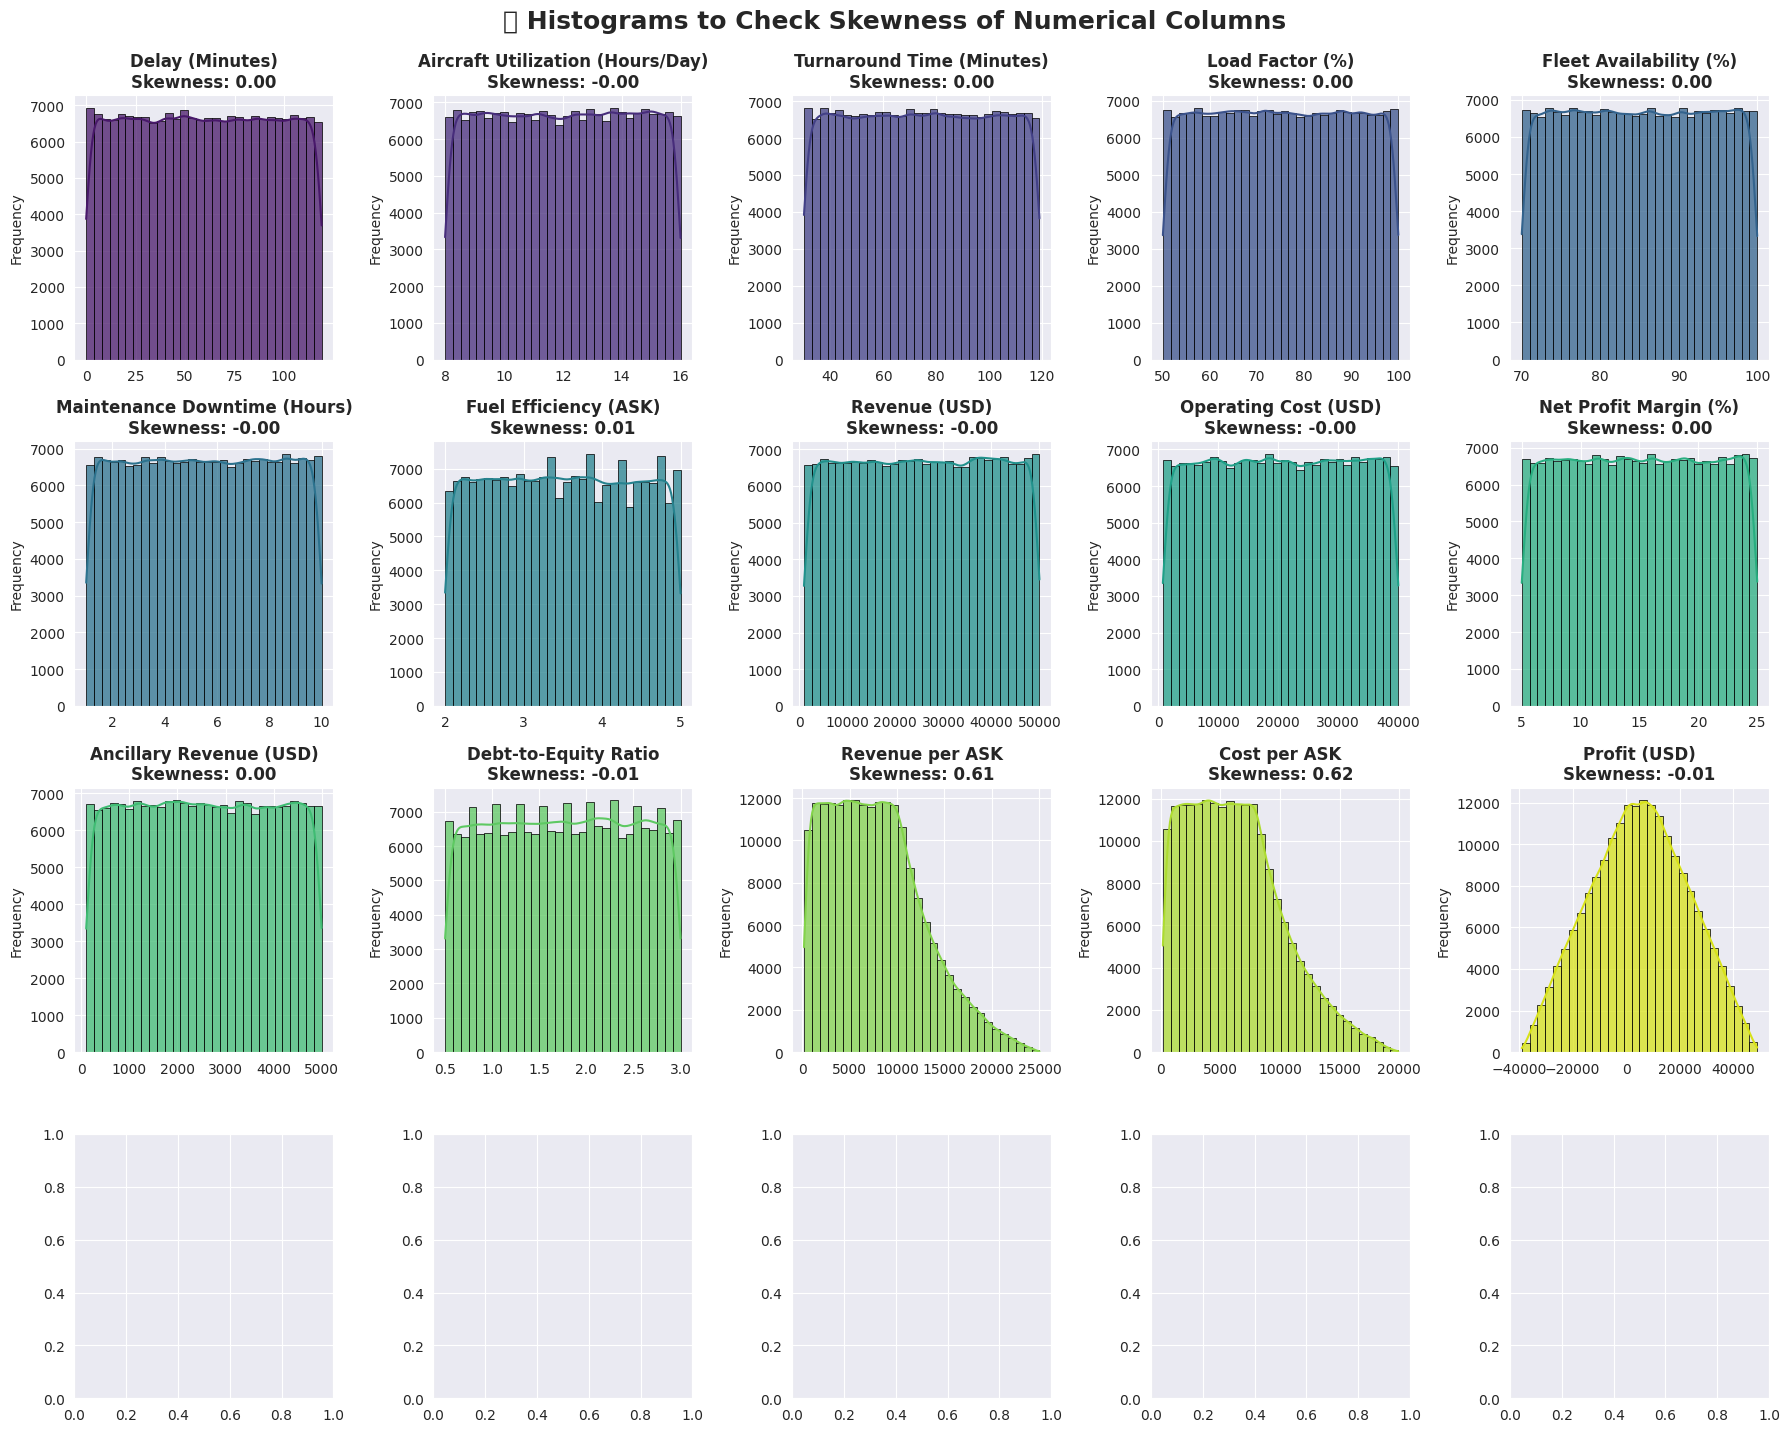

In [4]:
#Numerical columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

#Color palette and style
sns.set_style("darkgrid")
colors = sns.color_palette("viridis", len(numeric_columns))

#Create a figure
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(18, 14))
axes = axes.flatten()

#Plot each histogram to visualize skewness
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], bins=30, kde=True, color=colors[i], ax=axes[i], edgecolor="black", alpha=0.75)
    axes[i].set_title(f"{col}\nSkewness: {df[col].skew():.2f}", fontsize=12, fontweight="bold")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.suptitle("Histograms to Check Skewness of Numerical Columns", fontsize=18, fontweight="bold", y=1.02)
plt.show()

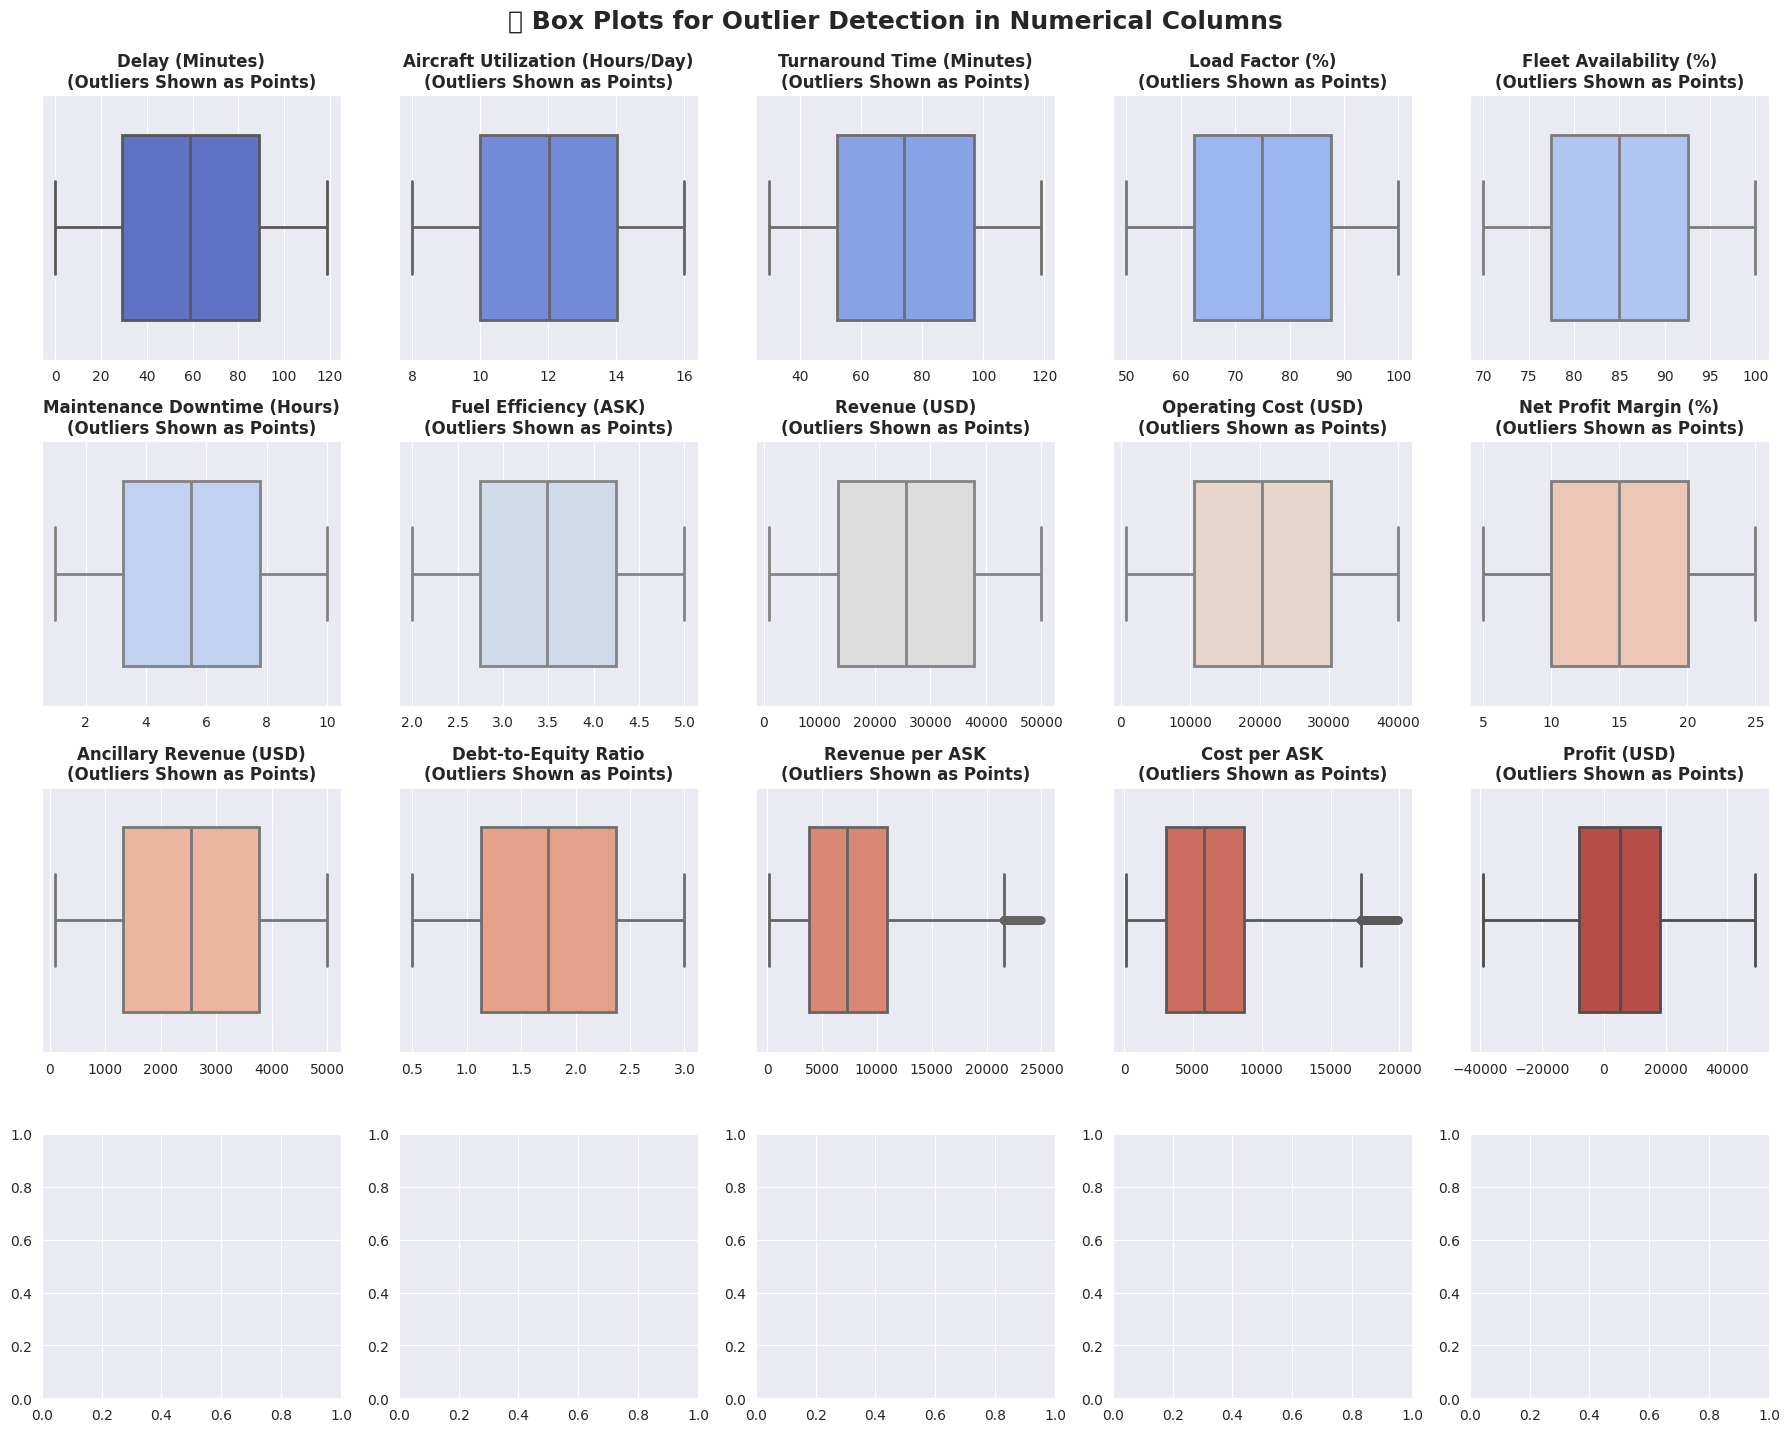

In [5]:
#Style and Colors
sns.set_style("darkgrid")
colors = sns.color_palette("coolwarm", len(numeric_columns))

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(18, 14))
axes = axes.flatten()

#Plot each boxplot to detect outliers
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df[col], ax=axes[i], color=colors[i], linewidth=2, width=0.7, flierprops={'marker': 'o', 'markersize': 5})
    axes[i].set_title(f"{col}\n(Outliers Shown as Points)", fontsize=12, fontweight="bold")
    axes[i].set_xlabel("")

#Layout
plt.tight_layout()
plt.suptitle("Box Plots for Outlier Detection in Numerical Columns", fontsize=18, fontweight="bold", y=1.02)
plt.show()

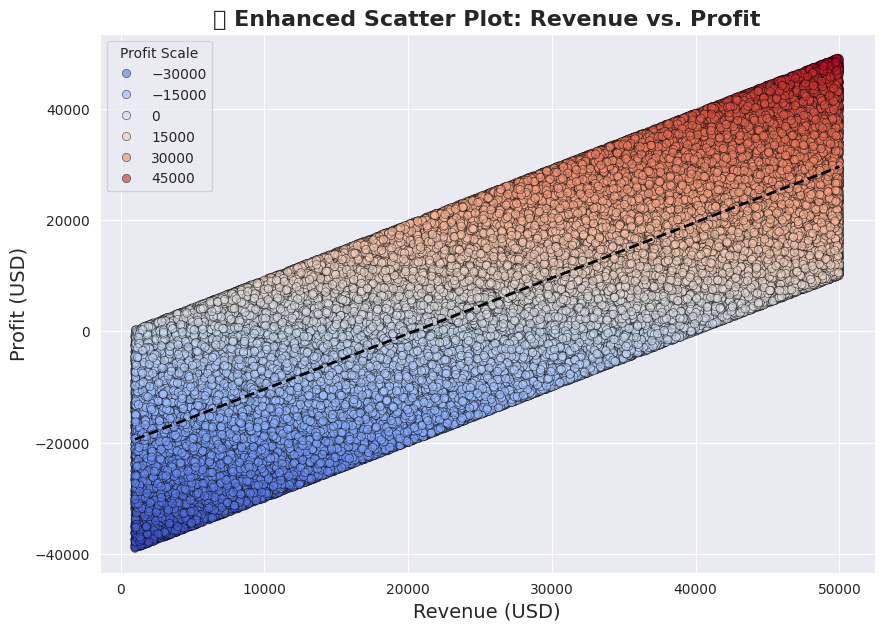

In [6]:
#Style and Colors
sns.set_style("darkgrid")
plt.figure(figsize=(10, 7))

#Scatter plot based on profit values
scatter = sns.scatterplot(
    x=df["Revenue (USD)"],
    y=df["Profit (USD)"],
    hue=df["Profit (USD)"],
    palette="coolwarm",
    alpha=0.6,
    edgecolor="black"
)

#Regression trendline
sns.regplot(
    x=df["Revenue (USD)"],
    y=df["Profit (USD)"],
    scatter=False,
    color="black",
    line_kws={"linewidth": 2, "linestyle": "--"}
)

#Titles and labels
plt.title("Enhanced Scatter Plot: Revenue vs. Profit", fontsize=16, fontweight="bold")
plt.xlabel("Revenue (USD)", fontsize=14)
plt.ylabel("Profit (USD)", fontsize=14)

#Legend
plt.legend(title="Profit Scale", loc="upper left")

plt.show()

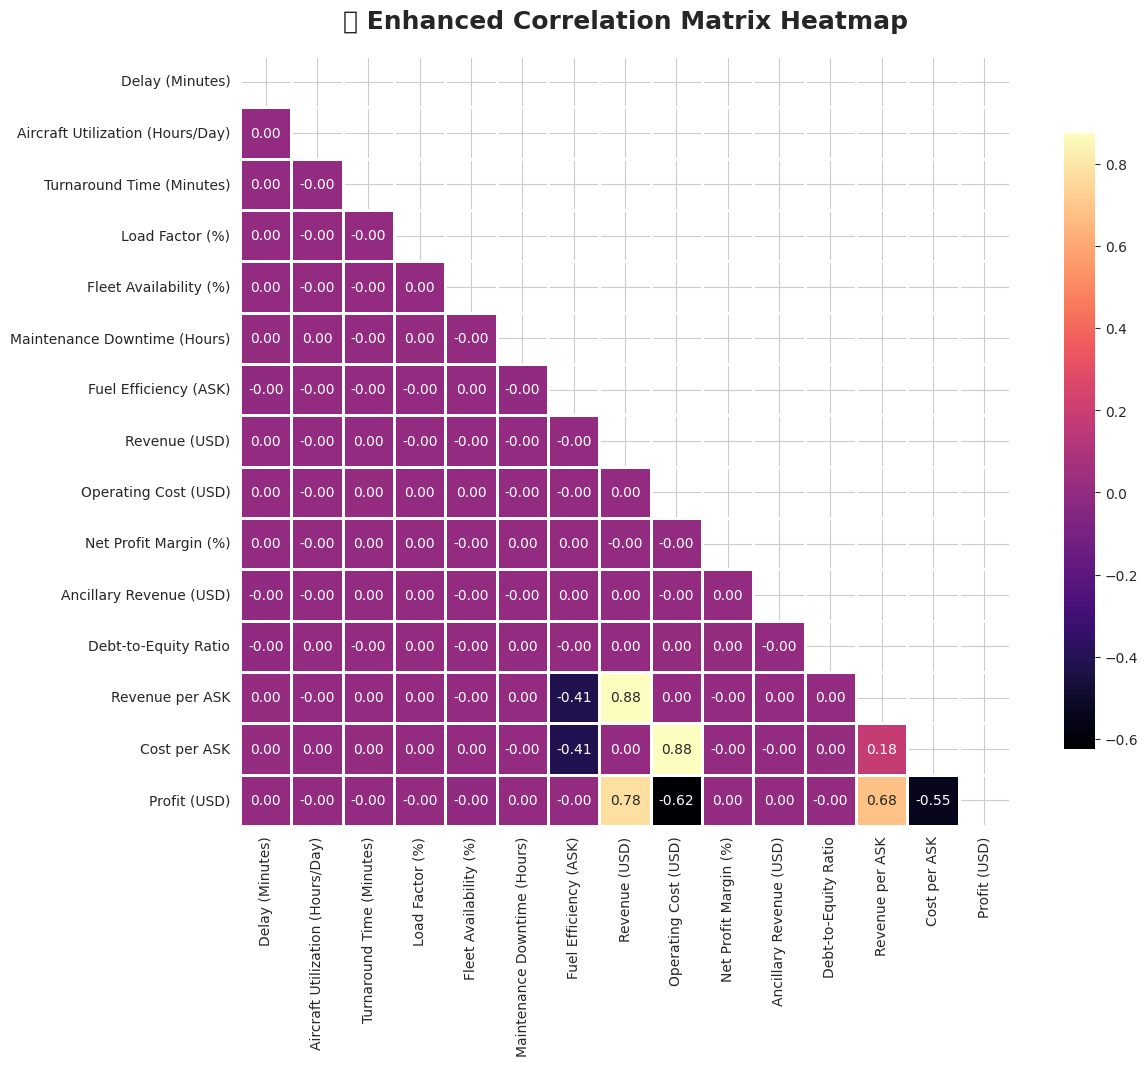

In [7]:
#Correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Mask upper triangle for clarity
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")

#Heatmap with improved aesthetics
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    cmap="magma",
    fmt=".2f",
    linewidths=1,
    cbar_kws={"shrink": 0.8},
    square=True
)

plt.title("Enhanced Correlation Matrix Heatmap", fontsize=18, fontweight="bold", pad=20)
plt.show()

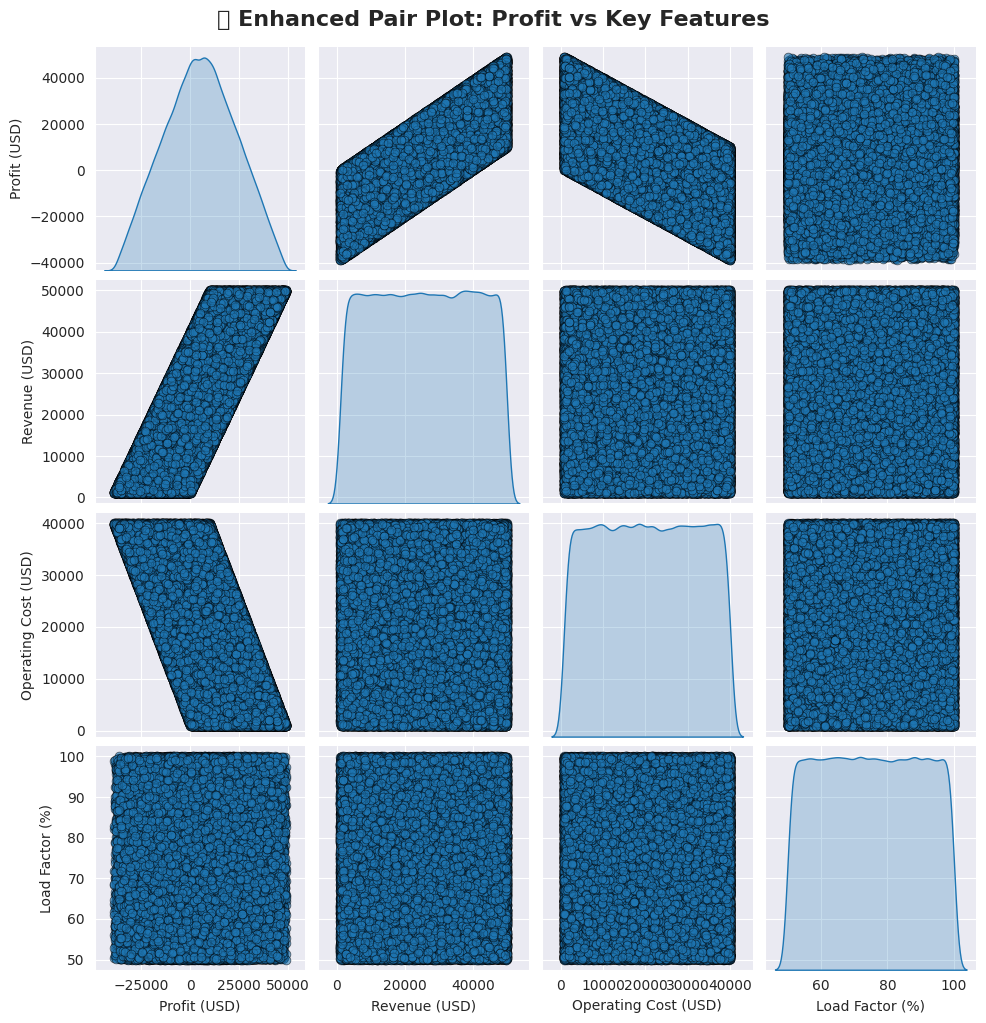

In [8]:
#The style, color, and KTE
sns.set_style("darkgrid")
pairplot = sns.pairplot(
    df[["Profit (USD)", "Revenue (USD)", "Operating Cost (USD)", "Load Factor (%)"]],
    diag_kind="kde",
    markers="o",
    palette="coolwarm",
    plot_kws={"alpha": 0.6, "s": 40, "edgecolor": "black"},
)

plt.suptitle("Enhanced Pair Plot: Profit vs Key Features", fontsize=16, fontweight="bold", y=1.02)
plt.show()

# Adding New Features

In [48]:
df["Delay Impact (%)"] = (df["Delay (Minutes)"] / df["Turnaround Time (Minutes)"]) * 100
df["Profit Margin (%)"] = (df["Profit (USD)"] / df["Revenue (USD)"]) * 100
df["Cost Efficiency Ratio"] = df["Operating Cost (USD)"] / df["Revenue (USD)"]
df["Departure Month"] = pd.to_datetime(df["Scheduled Departure Time"]).dt.month
df["Is_Holiday_Season"] = df["Departure Month"].apply(lambda x: 1 if x in [12, 6, 7] else 0)
df["Fuel Cost per ASK"] = df["Operating Cost (USD)"] / df["Fuel Efficiency (ASK)"]
df.head()

,Flight Number,Scheduled Departure Time,Actual Departure Time,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),...,Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD),Delay Impact (%),Profit Margin (%),Cost Efficiency Ratio,Departure Month,Is_Holiday_Season,Fuel Cost per ASK
0,FL885,2024-05-20 11:51:21,2024-07-10 02:38:53,50,12.36,115,79.18,96.24,9.21,4.15,...,2.46,2639.46,6710.26,-16893.84,43.478261,-154.228826,2.542288,5,0,6710.262651
1,FL930,2024-01-23 06:56:22,2024-07-07 02:53:44,27,14.53,83,98.59,80.49,1.55,3.93,...,2.89,8040.01,398.07,30032.84,32.530120,95.048905,0.049511,1,0,398.068702
2,FL478,2024-05-30 09:18:38,2024-12-05 01:00:54,108,10.73,87,67.44,97.90,2.06,4.26,...,1.34,3216.03,7158.42,-16794.61,124.137931,-122.585978,2.225860,5,0,7158.422535
3,FL637,2024-08-15 05:21:46,2024-09-21 13:23:41,64,15.10,99,69.01,80.17,6.85,4.13,...,0.60,9664.17,3255.23,26468.92,64.646465,66.316522,0.336835,8,0,3255.227603
4,FL318,2024-07-25 15:29:58,2024-03-21 15:05:54,30,13.46,114,50.36,82.23,7.30,4.97,...,0.84,2320.22,6975.65,-23137.50,26.315789,-200.646404,3.006464,7,1,6975.649899


# Flight Analysis based on Profit, Delayed-Time, Cost-efficient


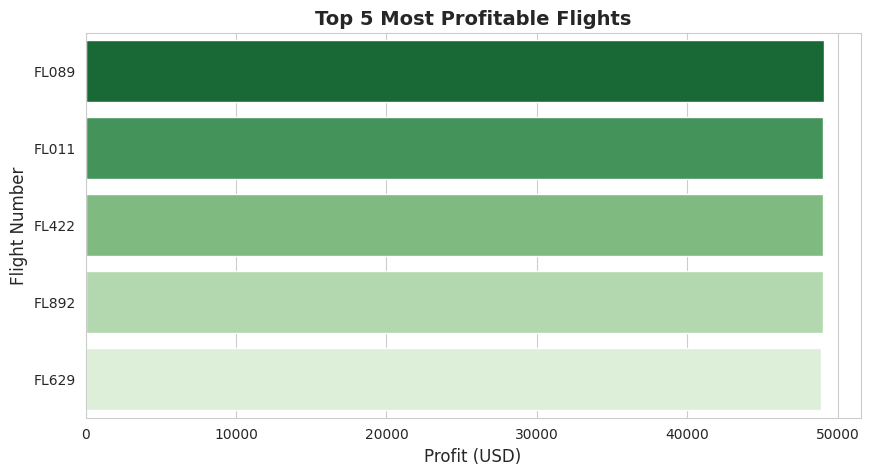

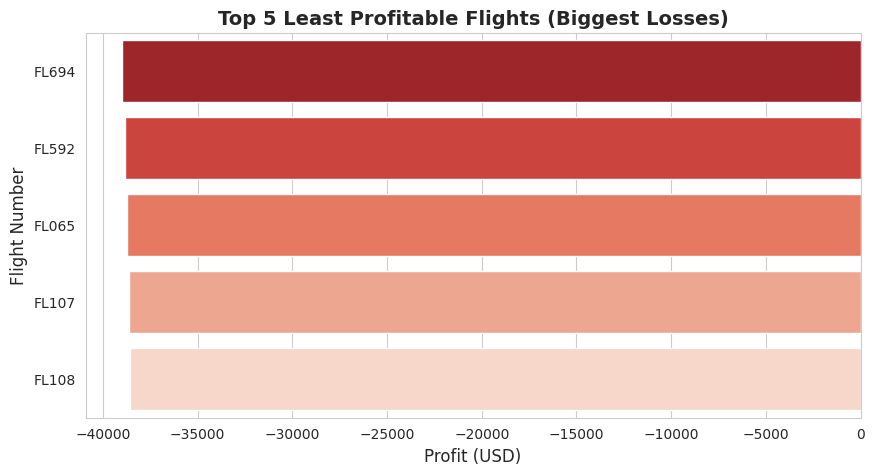

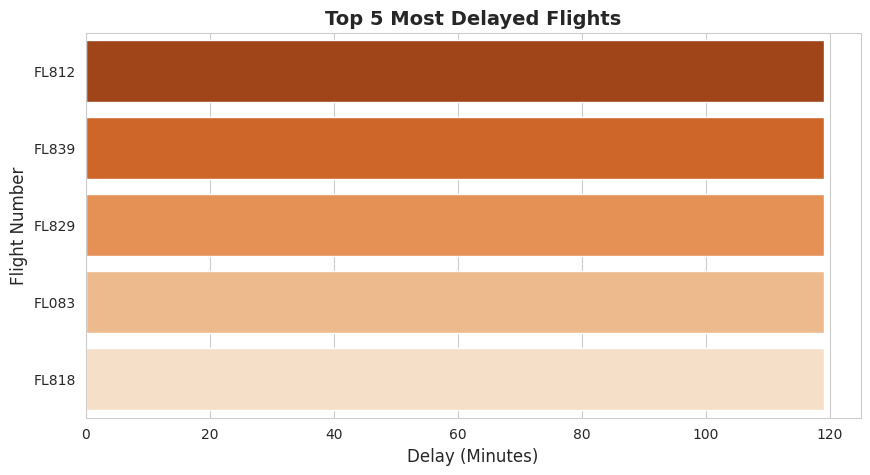

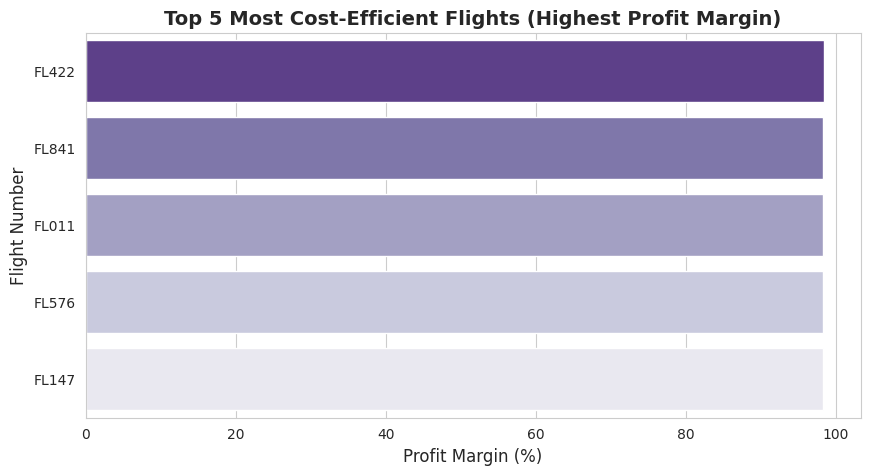

In [56]:
# Top/Bottom 5 Series Charts
top_5_profitable = df.nlargest(5, "Profit (USD)")[["Flight Number", "Profit (USD)", "Revenue (USD)", "Operating Cost (USD)"]]

bottom_5_profitable = df.nsmallest(5, "Profit (USD)")[["Flight Number", "Profit (USD)", "Revenue (USD)", "Operating Cost (USD)"]]

top_5_delayed = df.nlargest(5, "Delay (Minutes)")[["Flight Number", "Delay (Minutes)", "Profit (USD)", "Revenue (USD)"]]

top_5_efficient = df.nlargest(5, "Profit Margin (%)")[["Flight Number", "Profit Margin (%)", "Revenue (USD)", "Operating Cost (USD)"]]

sns.set_style("whitegrid")

#Top 5 Most Profitable Flights
plt.figure(figsize=(10, 5))
sns.barplot(x="Profit (USD)", y="Flight Number", data=top_5_profitable, palette="Greens_r")
plt.title("Top 5 Most Profitable Flights", fontsize=14, fontweight="bold")
plt.xlabel("Profit (USD)", fontsize=12)
plt.ylabel("Flight Number", fontsize=12)
plt.show()

#Top 5 Least Profitable Flights
plt.figure(figsize=(10, 5))
sns.barplot(x="Profit (USD)", y="Flight Number", data=bottom_5_profitable, palette="Reds_r")
plt.title("Top 5 Least Profitable Flights (Biggest Losses)", fontsize=14, fontweight="bold")
plt.xlabel("Profit (USD)", fontsize=12)
plt.ylabel("Flight Number", fontsize=12)
plt.show()

#Top 5 Most Delayed Flights
plt.figure(figsize=(10, 5))
sns.barplot(x="Delay (Minutes)", y="Flight Number", data=top_5_delayed, palette="Oranges_r")
plt.title("Top 5 Most Delayed Flights", fontsize=14, fontweight="bold")
plt.xlabel("Delay (Minutes)", fontsize=12)
plt.ylabel("Flight Number", fontsize=12)
plt.show()

#Top 5 Most Cost-Efficient Flights
plt.figure(figsize=(10, 5))
sns.barplot(x="Profit Margin (%)", y="Flight Number", data=top_5_efficient, palette="Purples_r")
plt.title("Top 5 Most Cost-Efficient Flights (Highest Profit Margin)", fontsize=14, fontweight="bold")
plt.xlabel("Profit Margin (%)", fontsize=12)
plt.ylabel("Flight Number", fontsize=12)
plt.show()

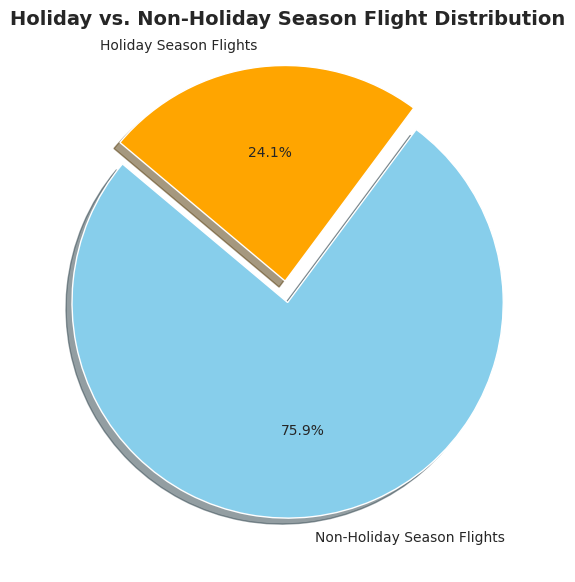

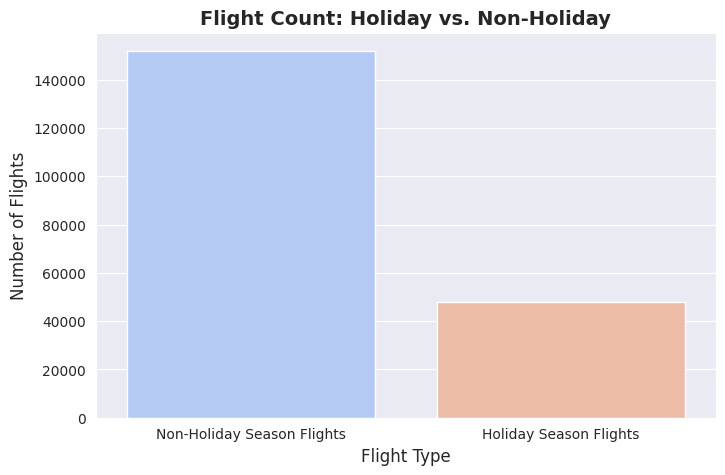

In [53]:
#Count flights for each category
season_counts = df.groupby("Is_Holiday_Season")["Flight Number"].count()

#Labels
labels = ["Non-Holiday Season Flights", "Holiday Season Flights"]

#Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(season_counts, labels=labels, autopct="%1.1f%%", colors=["skyblue", "orange"], startangle=140, explode=(0, 0.1), shadow=True)
plt.title("Holiday vs. Non-Holiday Season Flight Distribution", fontsize=14, fontweight="bold")
plt.show()

#Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=season_counts.values, palette="coolwarm")
plt.title("Flight Count: Holiday vs. Non-Holiday", fontsize=14, fontweight="bold")
plt.xlabel("Flight Type", fontsize=12)
plt.ylabel("Number of Flights", fontsize=12)
plt.show()

In [16]:
#Drop unwanted columns
df.drop(columns=['Flight Number','Scheduled Departure Time', 'Actual Departure Time'], inplace=True)

In [17]:
#Numeric features for scaling
num_features = [
    "Delay (Minutes)", "Aircraft Utilization (Hours/Day)", "Turnaround Time (Minutes)",
    "Load Factor (%)", "Fleet Availability (%)", "Maintenance Downtime (Hours)",
    "Fuel Efficiency (ASK)", "Revenue (USD)", "Operating Cost (USD)",
    "Ancillary Revenue (USD)", "Debt-to-Equity Ratio", "Revenue per ASK",
    "Cost per ASK", "Delay Impact (%)", "Profit Margin (%)", "Cost Efficiency Ratio",
    "Fuel Cost per ASK", "Departure Month"
]

#Apply StandardScaler
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

df.head()

,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),...,Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD),Delay Impact (%),Profit Margin (%),Cost Efficiency Ratio,Departure Month,Is_Holiday_Season,Fuel Cost per ASK
0,-0.269895,0.154225,1.560886,0.289682,1.295908,1.425044,0.754694,-1.032434,0.655562,17.90,...,0.982453,-1.046917,0.117414,-16893.84,-0.697886,-0.325109,0.325109,-0.419529,0,0.117414
1,-0.933179,1.092823,0.329063,1.633925,-0.520200,-1.519693,0.500448,0.425597,-1.667016,7.70,...,1.579516,0.044761,-1.477642,30032.84,-0.854378,0.553170,-0.553170,-1.591851,0,-1.477642
2,1.402735,-0.550804,0.483041,-0.523374,1.487320,-1.323634,0.881816,-0.838450,0.889496,5.84,...,-0.572687,-0.930368,0.230661,-16794.61,0.455056,-0.213622,0.213622,-0.419529,0,0.230662
3,0.133844,1.339367,0.944974,-0.414643,-0.557099,0.517788,0.731580,1.012931,-0.617239,24.09,...,-1.600191,0.373072,-0.755653,26468.92,-0.395310,0.451937,-0.451937,0.459713,0,-0.755654
4,-0.846664,0.630012,1.522391,-1.706252,-0.319563,0.690782,1.702335,-0.991630,1.258351,7.18,...,-1.266947,-1.111449,0.184476,-23137.50,-0.943205,-0.488652,0.488652,0.166632,1,0.184476


# Model Selection

In [18]:
#Features (X) and Target (y)
X = df.drop(columns=["Profit (USD)"])
y = df["Profit (USD)"]

#Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((160000, 20), (40000, 20))

In [25]:
#Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=42)
}

#Train and evaluate
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R2 Score": r2}

#Save results to DataFrame
results_df = pd.DataFrame(results).T
results_df

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.054790 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4297
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 20
[LightGBM] [Info] Start training from score 5098.274824


,MAE,RMSE,R2 Score
Linear Regression,9.404039e-11,1.092856e-10,1.000000
Random Forest,2.744098e+01,3.800266e+01,0.999996
XGBoost,1.451499e+02,1.856585e+02,0.999894
LightGBM,1.445156e+02,1.852663e+02,0.999895


In [30]:
#Parameter grid
param_grid = {
    "n_estimators": [100, 300, 500],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7],
    "num_leaves": [20, 31, 50],
    "min_data_in_leaf": [10, 20, 30]
}

#LightGBM model
lgb_model = lgb.LGBMRegressor(random_state=42)

#Randomized Search with 3-Fold Cross Validating
random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    scoring="neg_mean_absolute_error",
    verbose=2,
    n_jobs=-1
)

#Fitting the model
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_params

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4297
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 20
[LightGBM] [Info] Start training from score 5098.274824


{'num_leaves': 31,
 'n_estimators': 500,
 'min_data_in_leaf': 10,
 'max_depth': 7,
 'learning_rate': 0.1}

In [31]:
#LightGBM with optimized parameters
best_lgbm = lgb.LGBMRegressor(**best_params, random_state=42)
best_lgbm.fit(X_train, y_train)

#Predictions
y_pred_lgbm = best_lgbm.predict(X_test)

#Evaluate performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_lgbm)
rmse = mean_squared_error(y_test, y_pred_lgbm)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lgbm)

mae, rmse, r2

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032868 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4297
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 20
[LightGBM] [Info] Start training from score 5098.274824
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


(98.77720972909292, 185.2662953221741, 0.9999516883319619)

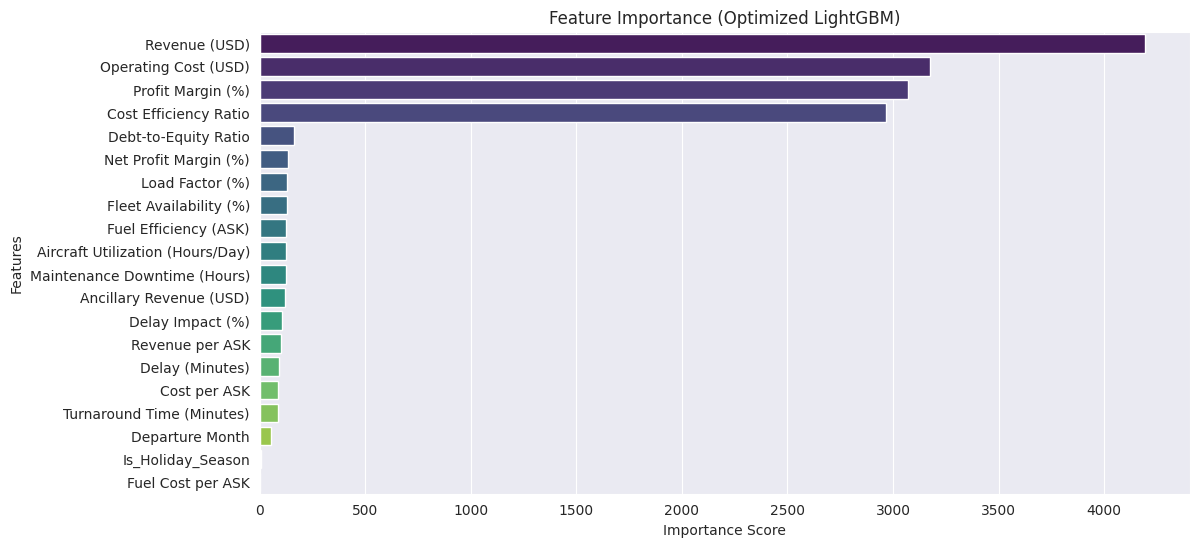

In [32]:
#Feature importance scores
feature_importance = best_lgbm.feature_importances_
features = X.columns

importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

#Plot the Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")
plt.title("Feature Importance (Optimized LightGBM)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Model Hyper-Tuning

In [33]:
#Evaluate on training data
y_train_pred = best_lgbm.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

#Evaluate on test data
y_test_pred = best_lgbm.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

#Print output
print("Train MAE:", train_mae, "Test MAE:", test_mae)
print("Train RMSE:", train_rmse, "Test RMSE:", test_rmse)
print("Train R2:", train_r2, "Test R2:", test_r2)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
Train MAE: 94.43325884486508 Test MAE: 98.77720972909292
Train RMSE: 120.17404631253885 Test RMSE: 125.51451824742489
Train R2: 0.9999561102030518 Test R2: 0.9999516883319619


In [34]:
#Explain individual models
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
lgbm_model = lgb.LGBMRegressor(n_estimators=200, learning_rate=0.05, random_state=42)

#Train models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032346 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4297
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 20
[LightGBM] [Info] Start training from score 5098.274824


LGBMRegressor(learning_rate=0.05, n_estimators=200, random_state=42)

#Meta Model [Stacked Model]

In [35]:
#Predictions from base models
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
lgbm_pred = lgbm_model.predict(X_test)

#Stack predictions as new features
stacked_predictions = np.column_stack((rf_pred, xgb_pred, lgbm_pred))

In [36]:
# Meta-model (final model)
meta_model = LinearRegression()
meta_model.fit(stacked_predictions, y_test)

#Final predictions
final_pred = meta_model.predict(stacked_predictions)

In [37]:
#Evaluate stacked model
mae_stacked = mean_absolute_error(y_test, final_pred)
mse_stacked = mean_squared_error(y_test, final_pred)
rmse_stacked = np.sqrt(mse_stacked)
r2_stacked = r2_score(y_test, final_pred)

print("Stacked Model Performance:")
print(f"MAE: {mae_stacked:.2f}")
print(f"RMSE: {rmse_stacked:.2f}")
print(f"R² Score: {r2_stacked:.6f}")


Stacked Model Performance:
MAE: 25.56
RMSE: 35.19
R² Score: 0.999996


In [38]:
#SHAP explainer for LightGBM (since it's highly efficient)
explainer = shap.Explainer(lgbm_model, X_test)
shap_values = explainer(X_test)

100%|===================| 39960/40000 [07:13<00:00]       

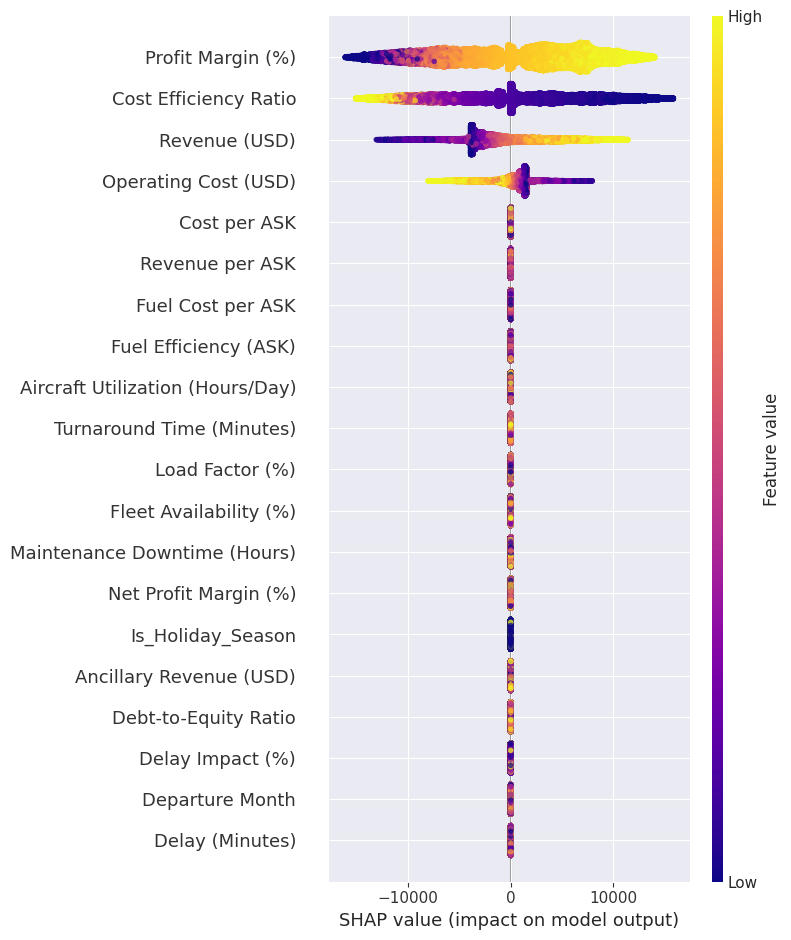

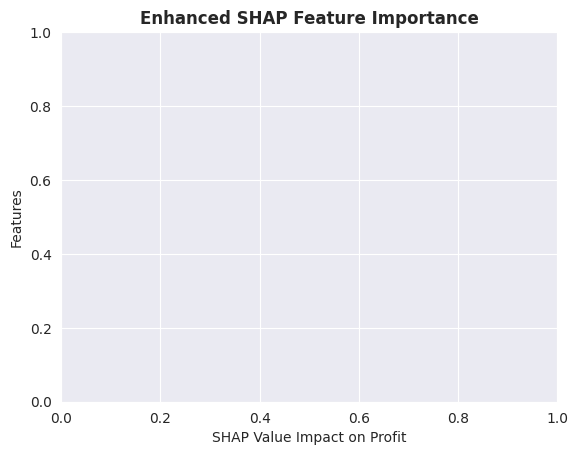

In [41]:
#Plot size and style
plt.figure(figsize=(7, 5))
shap.summary_plot(
    shap_values,
    X_test,
    plot_type="dot",
    cmap="plasma",
    alpha=0.75,
    show=True
)

#Title & Labels
plt.title("Enhanced SHAP Feature Importance", fontsize=12, fontweight="bold")
plt.xlabel("SHAP Value Impact on Profit", fontsize=10)
plt.ylabel("Features", fontsize=10)

plt.show()

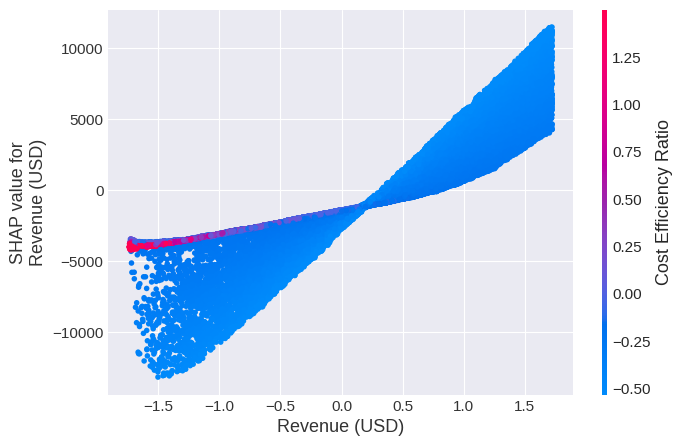

In [ ]:
#SHAP Dependence Plot for "Revenue (USD)"
shap.dependence_plot("Revenue (USD)", shap_values.values, X_test)

# **Cross-Validation**

In [45]:
#5-Fold Cross-Validation on Stacked Model
cv_scores = cross_val_score(meta_model, stacked_predictions, y_test, cv=5, scoring="r2")

print("Cross-Validation R² Scores:", cv_scores)
print("Mean R² Score:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-Validation R² Scores: [0.99999624 0.999996   0.99999628 0.99999617 0.99999632]
Mean R² Score: 0.9999962002939391
Standard Deviation: 1.130005256319755e-07
